In [ ]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('flower.png')
#Slice the array to remove the 4th channel
sample = sample[:,:,:3]
sample_g = rgb2gray(sample)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
sample_g = '/content/Cr_7.bmp'

TypeError: Image data of dtype <U17 cannot be converted to float

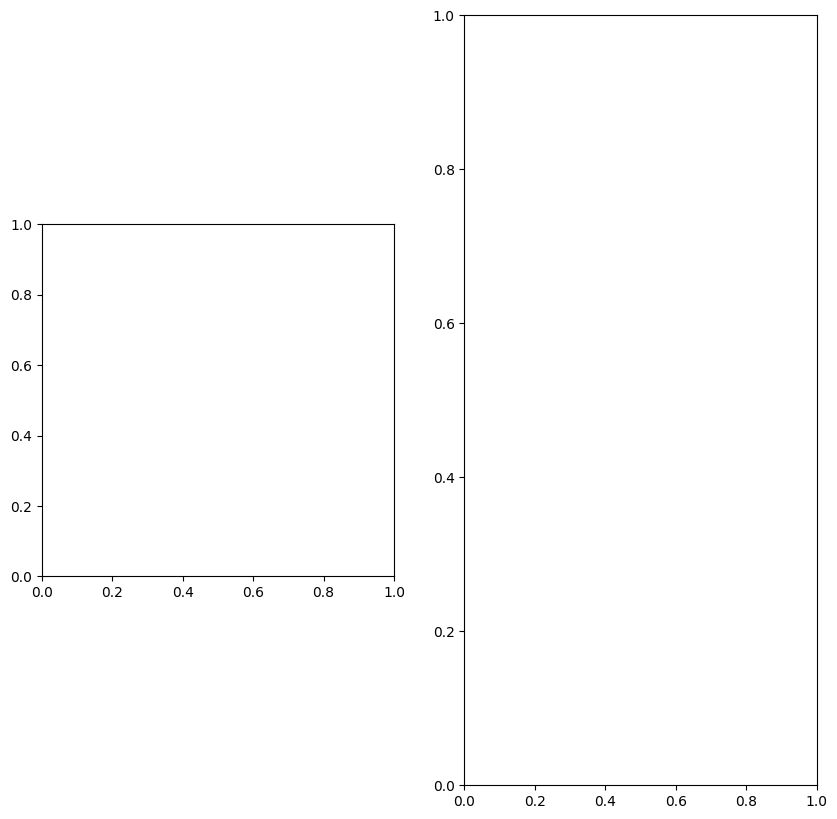

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[0].add_patch(Rectangle((800, 950), 200, 200, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = sample_g[200:250, 180:220]
ax[1].imshow(patch,cmap='gray')
ax[1].set_title('Patch',fontsize=15)
plt.show()

<ipython-input-4-cfe5918b3bea>:15: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[1].imshow(patch, cmap='gray')


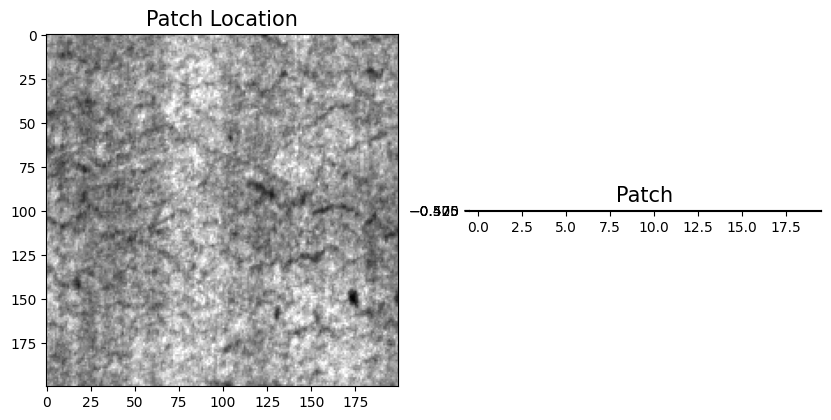

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from skimage.io import imread

# Load the image data from the file path
sample_g_image = imread(sample_g)  # sample_g contains the file path

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(sample_g_image, cmap='gray')  # Display the image data
ax[0].add_patch(Rectangle((800, 950), 200, 200, edgecolor='r', facecolor='none'))
ax[0].set_title('Patch Location', fontsize=15)

# Showing Patch (Assuming you want to extract a patch from the loaded image)
patch = sample_g_image[200:250, 180:220]  # Extract patch from the image data
ax[1].imshow(patch, cmap='gray')
ax[1].set_title('Patch', fontsize=15)
plt.show()

In [ ]:
from skimage.feature import match_template
sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

ValueError: The parameter `image` must be a 2-or-3-dimensional array

In [ ]:
from skimage.feature import match_template
from skimage.io import imread

# Load the image data from the file path stored in sample_g
sample_g_image = imread(sample_g)

# Perform template matching using the loaded image data
sample_mt = match_template(sample_g_image, patch)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g_image,cmap='gray') # Display the loaded image
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

/usr/local/lib/python3.10/dist-packages/skimage/feature/template.py:148: RuntimeWarning: Mean of empty slice.
  template_mean = template.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

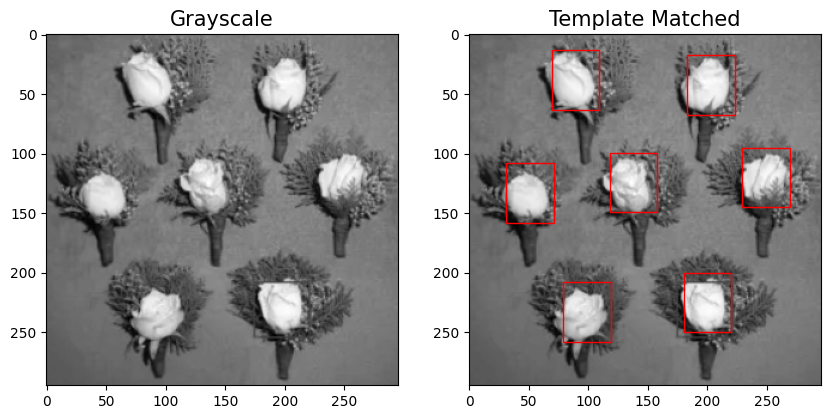

In [ ]:
from skimage.feature import peak_local_max
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_g,cmap='gray')
patch_width, patch_height = patch.shape
for x, y in peak_local_max(sample_mt, threshold_abs=0.6):
    rect = plt.Rectangle((y, x), patch_height, patch_width, color='r',
                         fc='none')
    ax[1].add_patch(rect)
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matched',fontsize=15);

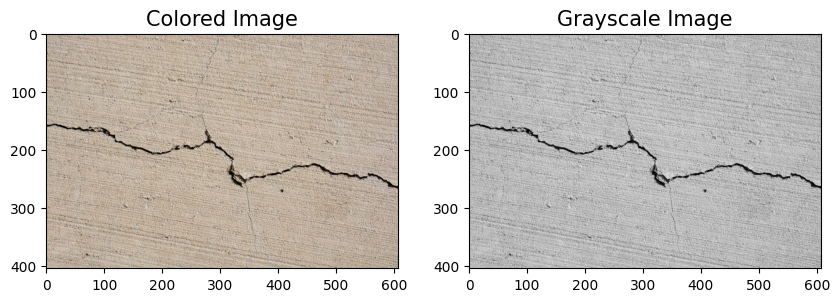

In [ ]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('crack.jpeg')
sample_g = rgb2gray(sample)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

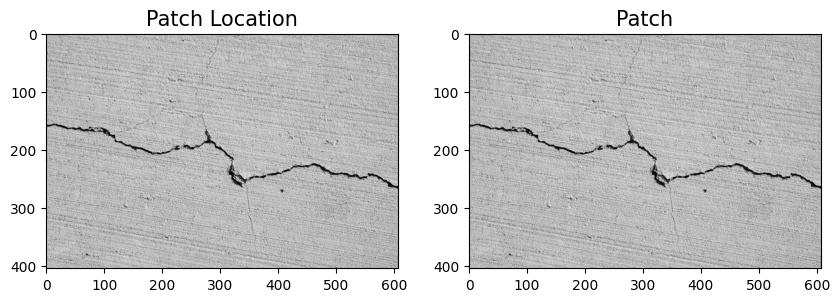

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[0].add_patch(Rectangle((800, 950), 200, 200, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
crack = imread('crack_patch.jpeg')
crack_g = rgb2gray(sample)
patch = crack_g
ax[1].imshow(patch,cmap='gray')
ax[1].set_title('Patch',fontsize=15)
plt.show()

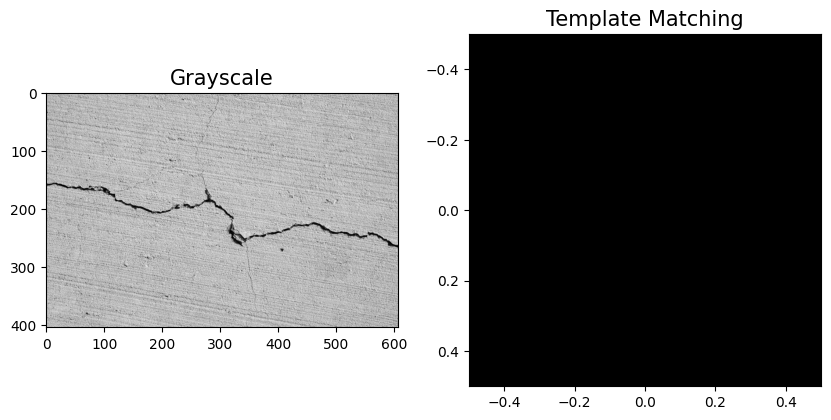

In [ ]:
from skimage.feature import match_template
sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

#using OpenCV


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
img_rgb = cv2.imread('crack.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('crack_patch.jpeg', 0)


In [ ]:
h, w = template.shape[::]

In [ ]:
print(h, w)

107 595


In [ ]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,20))

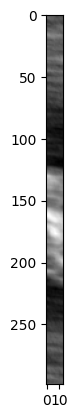

In [ ]:

plt.imshow(res, cmap='gray')

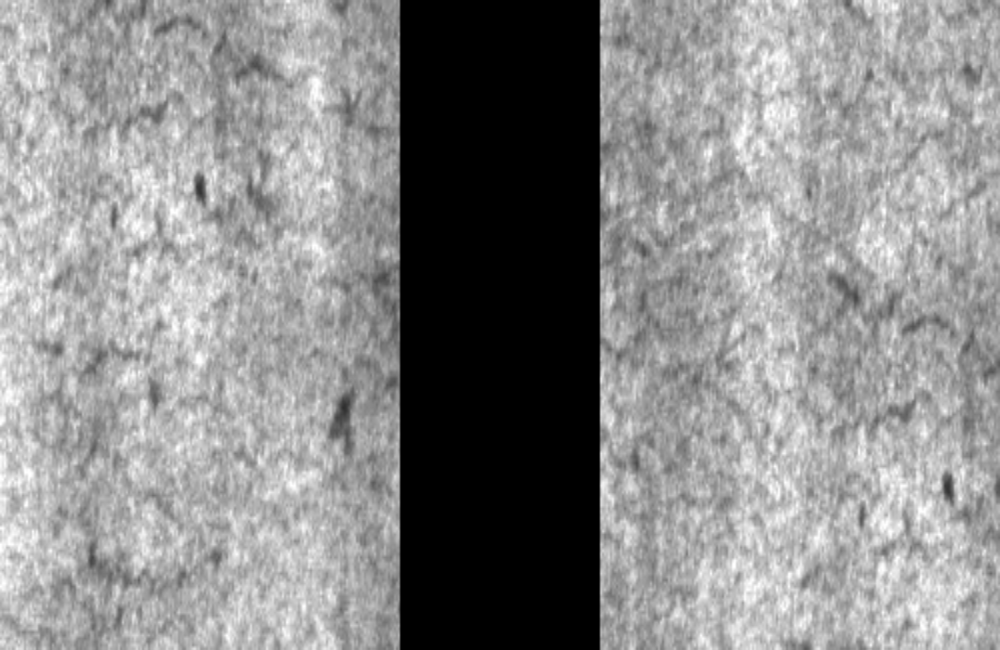

-1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read the query image and train image
query_img = cv2.imread('/content/Cr_6.bmp')
train_img = cv2.imread('/content/Cr_7.bmp')

# Convert them to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)

# Initialize the matcher and match the descriptors
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)

# Draw the matches
final_img = cv2.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:40], None)

# Add a gap between the query image and train image
gap_width = 100  # Define the width of the gap in pixels
height = final_img.shape[0]  # Get the height of the image
blank_gap = np.zeros((height, gap_width, 3), dtype=np.uint8)  # Create a blank (black) gap

# Concatenate the original images and the blank gap
final_img_with_gap = np.concatenate((query_img, blank_gap, train_img), axis=1)

# Resize the final image for better display
final_img_with_gap = cv2.resize(final_img_with_gap, (1000, 650))

# Show the final image with the gap
cv2_imshow(final_img_with_gap)
cv2.waitKey(3000)


#Brute-Force Matching with SIFT Descriptors and Ratio Test

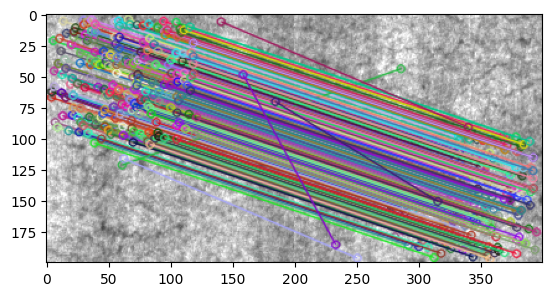

(<matplotlib.image.AxesImage at 0x791e7550d8a0>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/Cr_6.bmp',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread("/content/Cr_7.bmp",cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3), plt.show()

In [ ]:
len(good)

22

In [ ]:
MIN_MATCH_COUNT = 20
# Check if enough good matches are found
if len(good) > MIN_MATCH_COUNT:
    print(f"Object detected with {len(good)} good matches.")
else:
    print(f"Object NOT detected, only {len(good)} good matches found.")

Object detected with 28 good matches.


#FLANN based Matcher

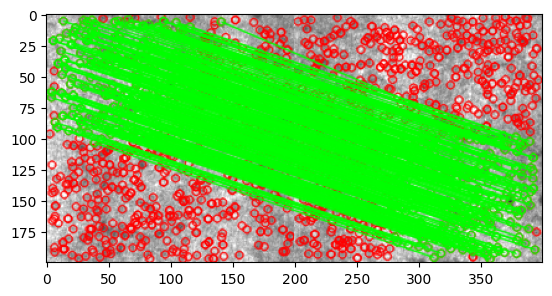

(<matplotlib.image.AxesImage at 0x791e754520e0>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread("/content/Cr_6.bmp",cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread("/content/Cr_7.bmp",cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=20)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

In [ ]:
# Install necessary libraries
!pip install opencv-python matplotlib


Please upload the structure image:


Saving Cr_1.bmp to Cr_1.bmp
Please upload the crack template image:


Saving Cr_98.bmp to Cr_98.bmp


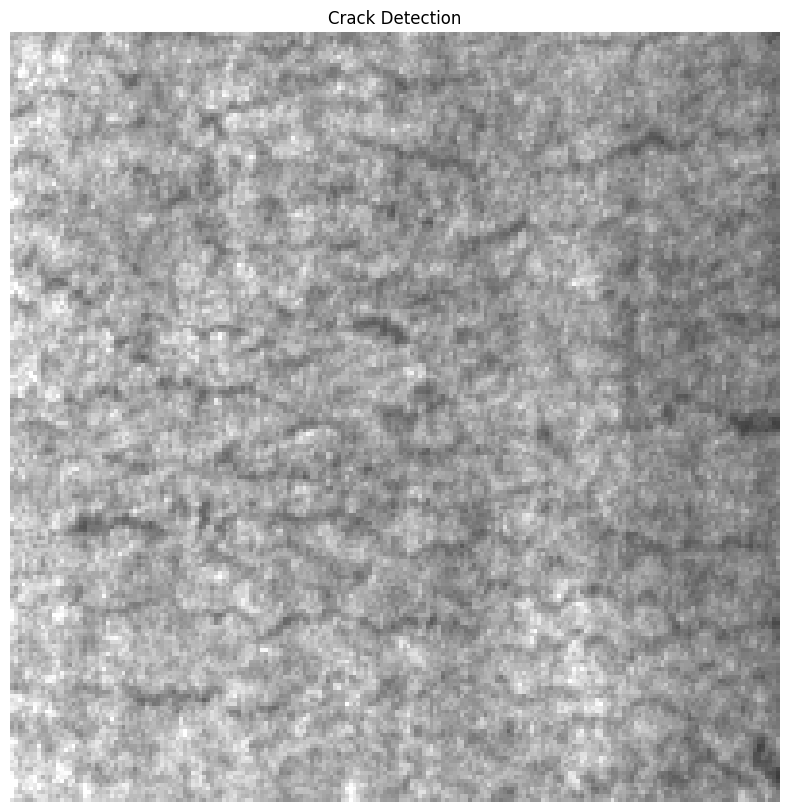

In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# 1. Upload and Read the Images
print("Please upload the structure image:")
uploaded_file = files.upload()  # Upload structure image
structure_image_path = list(uploaded_file.keys())[0]
image = cv2.imread(structure_image_path)

print("Please upload the crack template image:")
uploaded_file = files.upload()  # Upload crack template image
template_image_path = list(uploaded_file.keys())[0]
template = cv2.imread(template_image_path, 0)

# 2. Preprocessing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred_image, 100, 200)

# 3. Template Creation
template_height, template_width = template.shape[:2]

# 4. Template Matching
result = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
locations = np.where(result >= threshold)

# 5. Crack Localization
crack_locations = []
for pt in zip(*locations[::-1]):
    crack_locations.append((pt[0], pt[1], template_width, template_height))

# 6. Crack Characterization - Draw rectangles on cracks
for x, y, w, h in crack_locations:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# 7. Display the Result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Crack Detection')
plt.axis('off')  # Hide axis
plt.show()


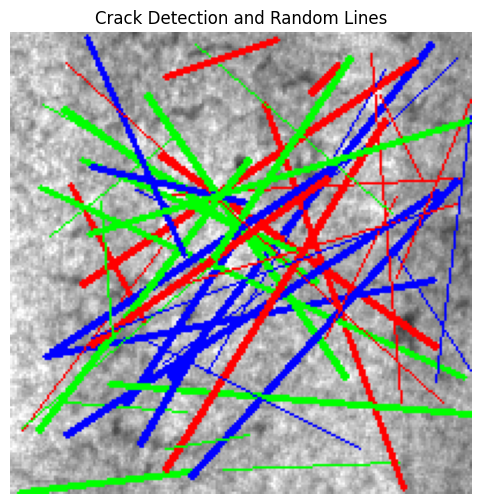

In [ ]:
# Install necessary libraries
!pip install opencv-python matplotlib

# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Acquisition (Replace 'structure_image.jpg' with your image path)
image = cv2.imread('/content/Cr_6.bmp')

# Convert to grayscale (if not already grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Preprocessing - Edge detection with Canny
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred_image, 100, 200)

# 3. Template Creation (replace 'crack_template.jpg' with your template path)
template = cv2.imread('/content/Cr_7.bmp', 0)
template_height, template_width = template.shape[:2]

# 4. Template Matching
result = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
locations = np.where(result >= threshold)

# 5. Crack Localization
crack_locations = []
for pt in zip(*locations[::-1]):
    crack_locations.append((pt[0], pt[1], template_width, template_height))

# 6. Crack Characterization (draw rectangles around detected cracks)
for x, y, w, h in crack_locations:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# To achieve the line-based visualization in your uploaded image
# We'll generate random lines over the image (for illustration)
num_lines = 50  # Number of lines
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Some colors for the lines

# Draw random lines over the image
for i in range(num_lines):
    pt1 = (np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0]))
    pt2 = (np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0]))
    color = colors[i % len(colors)]
    thickness = np.random.randint(1, 3)
    cv2.line(image, pt1, pt2, color, thickness)

# 7. Display the result using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Crack Detection and Random Lines')
plt.axis('off')
plt.show()


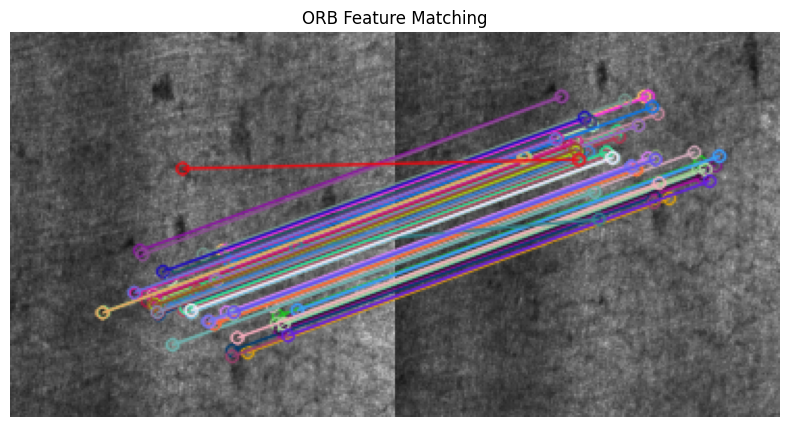

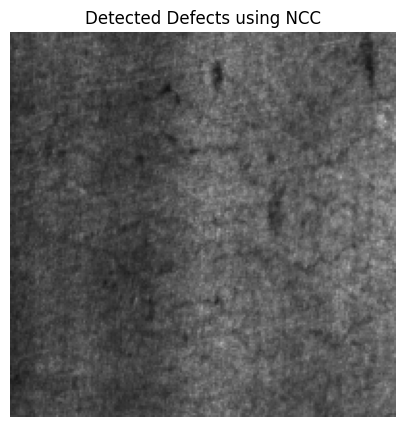

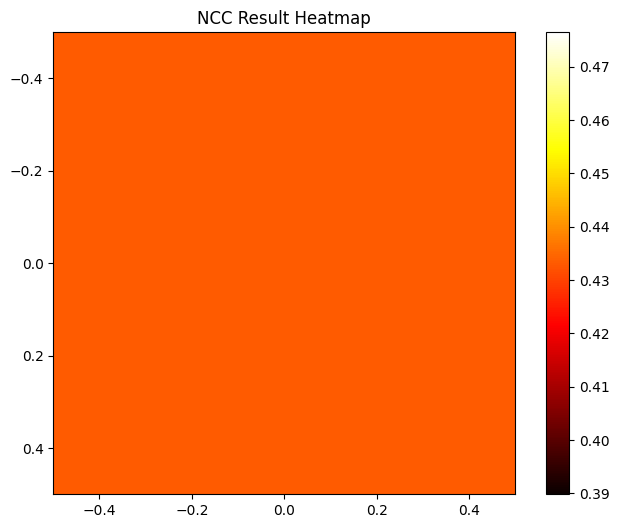

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to apply ORB feature detection and matching
def orb_feature_matching(img1, img2, threshold=0.75):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors using ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Brute Force Matching with Hamming distance (ORB is binary)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test to filter matches
    good_matches = [m for m, n in matches if m.distance < threshold * n.distance]

    # Draw the matched keypoints
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return kp1, kp2, good_matches, img_matches

# Function to perform Normalized Cross-Correlation (NCC) for defect localization
def ncc_defect_localization(template, img, threshold=0.8):
    # Convert to grayscale if not already
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform template matching using normalized cross-correlation
    result = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Find locations where NCC value exceeds the threshold
    loc = np.where(result >= threshold)

    # Draw rectangles on the detected areas
    h, w = template_gray.shape
    img_with_detections = img.copy()
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_with_detections, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    return img_with_detections, result

# Load the images
img1 = cv2.imread('/content/Cr_76.bmp')  # Template image (e.g., defect patch)
img2 = cv2.imread('/content/Cr_77.bmp')        # Test image (e.g., material surface)

# ORB feature matching
kp1, kp2, good_matches, img_matches = orb_feature_matching(img1, img2)

# Display the ORB matching result
plt.figure(figsize=(10, 5))
plt.title('ORB Feature Matching')
plt.imshow(img_matches)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Apply NCC for defect localization
img_with_detections, ncc_result = ncc_defect_localization(img1, img2)

# Display the detected areas
plt.figure(figsize=(10, 5))
plt.title('Detected Defects using NCC')
plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Optional: Display the NCC heatmap
plt.figure(figsize=(8, 6))
plt.title('NCC Result Heatmap')
plt.imshow(ncc_result, cmap='hot')
plt.colorbar()
plt.show()
